# Importación de Liberias

In [19]:
#Para Modelado y limpieza de datos
import pandas as pd
import numpy as np
#from funpymodeling.exploratory import status
#Para graficar
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline  # ✅ este sí permite SMOTE


from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor



from sklearn.metrics import mean_squared_error, classification_report,confusion_matrix, roc_auc_score, roc_curve,accuracy_score

from pyod.models.mad import MAD
from datetime import datetime

# Lectura de archivo

In [20]:
pd.set_option('display.max_columns', None)

In [21]:

ifood = "https://raw.githubusercontent.com/tommad1/Marketing-IFood/d31be9b11678e2540fa43992b0584c56572300de/marketing_campaign.csv"

marketing = pd.read_csv(ifood, sep=';')  
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# Exploración de dataframe

In [22]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [23]:
#valores nulos
marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [24]:
#cantidad de ceros
(marketing==0).sum()

ID                        1
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                1293
Teenhome               1158
Dt_Customer               0
Recency                  28
MntWines                 13
MntFruits               400
MntMeatProducts           1
MntFishProducts         384
MntSweetProducts        419
MntGoldProds             61
NumDealsPurchases        46
NumWebPurchases          49
NumCatalogPurchases     586
NumStorePurchases        15
NumWebVisitsMonth        11
AcceptedCmp3           2077
AcceptedCmp4           2073
AcceptedCmp5           2077
AcceptedCmp1           2096
AcceptedCmp2           2210
Complain               2219
Z_CostContact             0
Z_Revenue                 0
Response               1906
dtype: int64

In [25]:
# porcentaje de ceros
(marketing == 0).sum() / len(marketing) * 100

ID                      0.044643
Year_Birth              0.000000
Education               0.000000
Marital_Status          0.000000
Income                  0.000000
Kidhome                57.723214
Teenhome               51.696429
Dt_Customer             0.000000
Recency                 1.250000
MntWines                0.580357
MntFruits              17.857143
MntMeatProducts         0.044643
MntFishProducts        17.142857
MntSweetProducts       18.705357
MntGoldProds            2.723214
NumDealsPurchases       2.053571
NumWebPurchases         2.187500
NumCatalogPurchases    26.160714
NumStorePurchases       0.669643
NumWebVisitsMonth       0.491071
AcceptedCmp3           92.723214
AcceptedCmp4           92.544643
AcceptedCmp5           92.723214
AcceptedCmp1           93.571429
AcceptedCmp2           98.660714
Complain               99.062500
Z_CostContact           0.000000
Z_Revenue               0.000000
Response               85.089286
dtype: float64

In [26]:
#tipos de archivos
marketing.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [27]:
#cantidad de datos unicos por objeto
marketing.select_dtypes(include=['object']).nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

In [28]:
# cantidad de datos unicos numericos
marketing.select_dtypes(include=['int64']).nunique()

ID                     2240
Year_Birth               59
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# Preparación 

In [29]:
marketing = marketing.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])


# Datos de Perfil del cliente
los datos trabajados aqui son los datos demograficos para entender el perfil del cliente

### Datos Nulos Income

In [30]:
# Vemos cantidad de valores nulos en la columna
marketing['Income'].isnull().sum()

np.int64(24)

In [31]:
#Porcentaje de valores nulos en la columna
marketing['Income'].isnull().sum()/len(marketing['Income'])*100

np.float64(1.0714285714285714)

### Valores Aislados Income

In [32]:
# Estadisticas descriptivas
marketing['Income'].describe().T

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

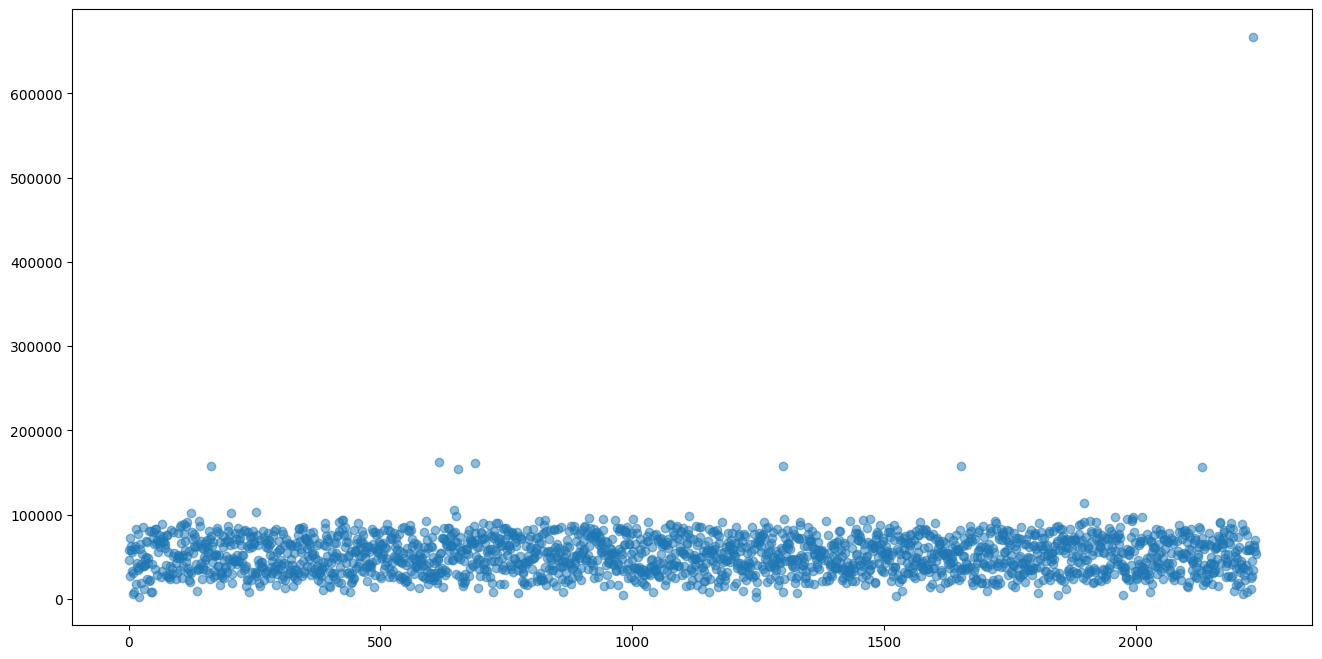

In [33]:
# hacer un Diagrama de dispersion para ver los valores aislados
integers=range(len(marketing['Income']))
plt.figure(figsize=(16,8))
plt.scatter(integers,marketing['Income'],alpha=0.5)

Graficamente se observan valores aislados en la dispersión 

<Axes: >

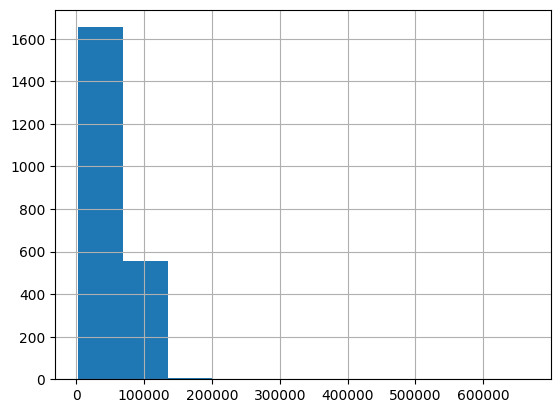

In [34]:
marketing['Income'].hist()

observamos que la distribucion no es normal, lo cual hace que si trabajamos con Z-score o cuartiles se vean mas afectado la mediana y la std

In [35]:
#importamos la libreria para Z-Score modificado
from pyod.models.mad import MAD

In [36]:
#Se instancia solamente los valores
income_re=marketing[['Income']].values.reshape(-1,1)

In [37]:
# fijame una umbral de 3.5, este es por defecto
mad=MAD(threshold=3.5)

In [38]:
#ajustamos el modelo
labels=mad.fit_predict(income_re)

c:\Users\tomasito\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
c:\Users\tomasito\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tomasito\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Encontramos 8 valores aislado

In [39]:
#Resultado de los datos aislados 
labels.sum()

np.int64(8)

In [40]:
#vemos los valores aislados
marketing[labels == 1][['Income']]


,Income
164,157243.0
617,162397.0
655,153924.0
687,160803.0
1300,157733.0
1653,157146.0
2132,156924.0
2233,666666.0


In [41]:
#marketing['Income_Aislado']=labels

In [42]:
marketing['Income_cat'], Income_bins=pd.qcut(marketing['Income'],q=5,retbins=True)

In [43]:
marketing['Income_cat']=marketing['Income_cat'].cat.add_categories("Desconocido")

In [44]:
marketing['Income_cat']=marketing['Income_cat'].fillna(value='Desconocido')

In [45]:
marketing['Income_cat'].value_counts()

Income_cat
(1729.999, 32011.0]    444
(32011.0, 44529.0]     443
(44529.0, 58482.0]     443
(58482.0, 71819.0]     443
(71819.0, 666666.0]    443
Desconocido             24
Name: count, dtype: int64

In [46]:
marketing=marketing.drop(['Income'], axis=1)

### Columna Year_birth

In [47]:
marketing['Year_Birth'].dtype

dtype('int64')

In [48]:
marketing['Year_Birth'].describe().T

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

<Axes: >

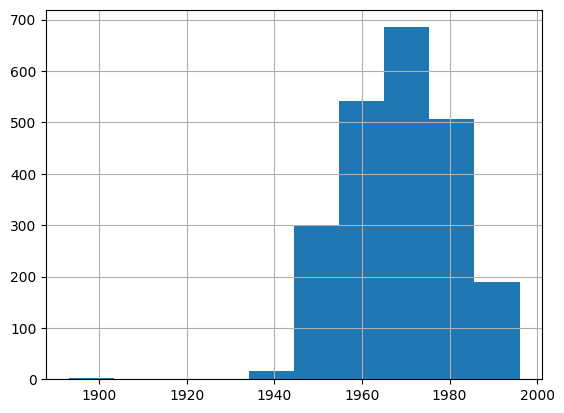

In [49]:
marketing['Year_Birth'].hist()

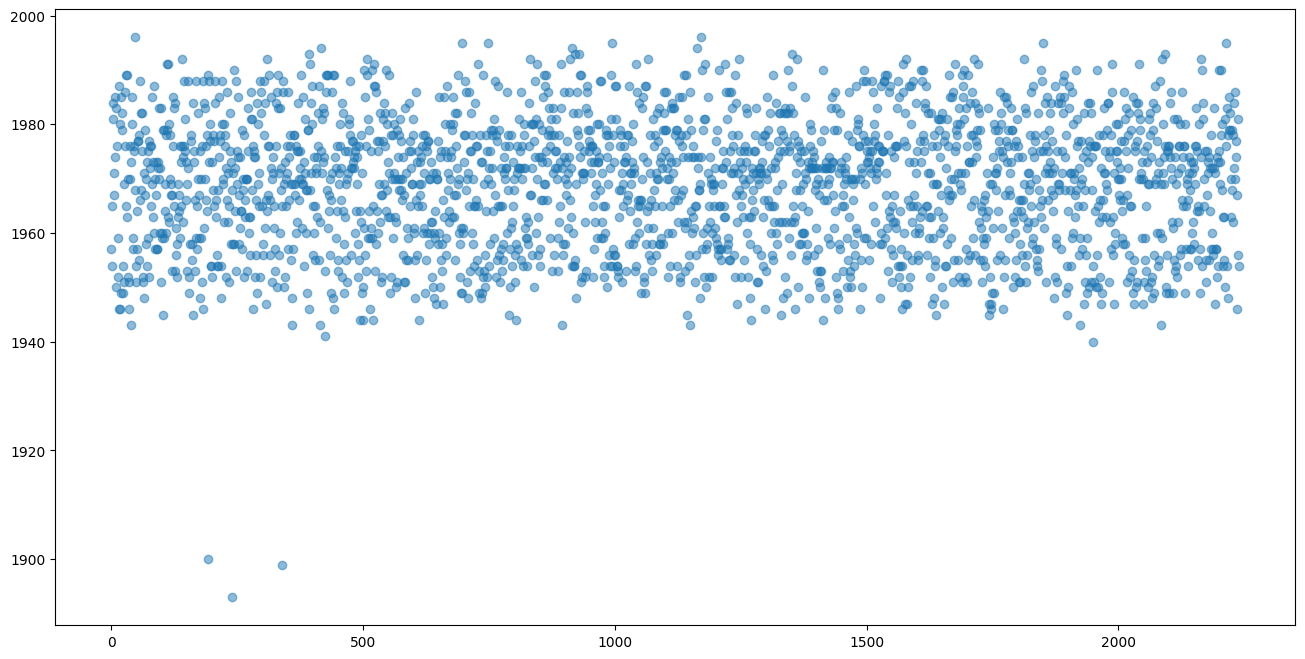

In [50]:
integers_yb=range(len(marketing['Year_Birth']))
plt.figure(figsize=(16,8))
plt.scatter(integers_yb,marketing['Year_Birth'],alpha=0.5)

In [51]:
def IQR(df, variable_name):
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    factor=iqr*3
    lower_limit=q1-factor
    upper_limit=q3+factor

    return lower_limit, upper_limit

  

In [52]:
lower_limit, upper_limit = IQR(marketing, 'Year_Birth')

In [53]:
lower_limit

np.float64(1905.0)

In [54]:
upper_limit

np.float64(2031.0)

In [55]:
aislados_year_birth=marketing[(marketing['Year_Birth']<lower_limit) | (marketing['Year_Birth']>upper_limit)]
len(aislados_year_birth)

3

In [56]:
aislados_year_birth

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income_cat
192,1900,2n Cycle,Divorced,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,"(32011.0, 44529.0]"
239,1893,2n Cycle,Single,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,"(58482.0, 71819.0]"
339,1899,PhD,Together,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,"(71819.0, 666666.0]"


In [57]:
marketing = marketing.drop(aislados_year_birth.index).reset_index(drop=True)


In [58]:
#convertimos integer a fecha
marketing['Year_Birth']=pd.to_datetime(marketing['Year_Birth'], format='%Y')

In [59]:
current_year = datetime.now().year


In [60]:
marketing['Age'] = current_year - marketing['Year_Birth'].dt.year

In [61]:
marketing['Age'].describe().T

count    2237.000000
mean       56.098346
std        11.701917
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        85.000000
Name: Age, dtype: float64

In [62]:
marketing=marketing.drop(['Year_Birth'], axis=1)

In [63]:
#marketing['Age_cat'], Age_bins=pd.qcut(marketing['Age'],q=5,retbins=True)

In [64]:
#marketing['Age_cat'].value_counts()

In [65]:
#marketing=marketing.drop(['Age'],axis=1)

### Columna Education 

In [66]:
marketing['Education'].isnull().sum()

np.int64(0)

In [67]:
marketing['Education'].dtype

dtype('O')

In [68]:
marketing['Education'].value_counts()

Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [69]:
def agrupar_educacion(nivel):
    if nivel in ['Basic']:
        return 'Low'
    elif nivel in ['2n Cycle', 'Graduation']:
        return 'Medium'
    elif nivel in ['Master', 'PhD']:
        return 'High'
    else:
        return 'Other'




In [70]:
marketing['Education_Level'] = marketing['Education'].apply(agrupar_educacion)

In [71]:
marketing=marketing.drop(['Education'],axis=1)

In [72]:
marketing['Education_Level'].value_counts()

Education_Level
Medium    1328
High       855
Low         54
Name: count, dtype: int64

In [73]:
Education_maps={'Low': 1,'Medium': 2,'High': 3,'Other': 0}

In [74]:
marketing['Education_Level'] = marketing['Education_Level'].map(Education_maps)

In [75]:
marketing['Education_Level'].value_counts()



Education_Level
2    1328
3     855
1      54
Name: count, dtype: int64

lo anterios lo podemos hacer como high medium y lou como 3,2,1

### Columna Marital Status


In [76]:
marketing['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [77]:
def agrupar_estado_civil(estado):
    if estado in ['Married', 'Together']:
        return 'In_Relationship'
    elif estado in ['Single', 'Divorced', 'Widow']:
        return 'Not_In_Relationship'
    else:
        return 'Other'

marketing['Marital_Group'] = marketing['Marital_Status'].apply(agrupar_estado_civil)


In [78]:
marketing['Marital_Group'] = marketing['Marital_Status'].apply(agrupar_estado_civil)

In [79]:
marketing['Marital_Group'].value_counts()

Marital_Group
In_Relationship        1443
Not_In_Relationship     787
Other                     7
Name: count, dtype: int64

In [80]:
marketing=marketing.drop(['Marital_Status'], axis=1)

Pendiente no se borrara la primera columna

In [81]:
marital_dummies = pd.get_dummies(marketing['Marital_Group'], prefix='Marital')



In [82]:
marketing = pd.concat([marketing, marital_dummies], axis=1)

In [83]:
marketing=marketing.drop(['Marital_Group'], axis=1)

### Columna 'Kidhome' y 'Teenhome'

In [84]:
marketing['Children'] = marketing['Kidhome'] + marketing['Teenhome']


In [85]:
marketing['Children'].value_counts()

Children
1    1126
0     637
2     421
3      53
Name: count, dtype: int64

In [86]:
marketing=marketing.drop(['Kidhome', 'Teenhome'], axis=1)

In [87]:
marketing

,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income_cat,Age,Education_Level,Marital_In_Relationship,Marital_Not_In_Relationship,Marital_Other,Children
0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,"(44529.0, 58482.0]",68,2,False,True,False,0
1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,"(44529.0, 58482.0]",71,2,False,True,False,2
2,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,"(58482.0, 71819.0]",60,2,True,False,False,0
3,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,"(1729.999, 32011.0]",41,2,True,False,False,1
4,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,"(44529.0, 58482.0]",44,3,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,"(58482.0, 71819.0]",58,2,True,False,False,1
2233,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,"(58482.0, 71819.0]",79,3,True,False,False,3
2234,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,"(44529.0, 58482.0]",44,2,False,True,False,0
2235,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,"(58482.0, 71819.0]",69,3,True,False,False,1


### Columna Dt_Customer

In [88]:
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'])


In [89]:
marketing['Customer_Fidelity'] = (datetime.now() - marketing['Dt_Customer']).dt.days

In [90]:
marketing=marketing.drop(['Dt_Customer'], axis=1)

In [91]:
marketing

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income_cat,Age,Education_Level,Marital_In_Relationship,Marital_Not_In_Relationship,Marital_Other,Children,Customer_Fidelity
0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,"(44529.0, 58482.0]",68,2,False,True,False,0,4627
1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,"(44529.0, 58482.0]",71,2,False,True,False,2,4077
2,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,"(58482.0, 71819.0]",60,2,True,False,False,0,4276
3,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,"(1729.999, 32011.0]",41,2,True,False,False,1,4103
4,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,"(44529.0, 58482.0]",44,3,True,False,False,1,4125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,"(58482.0, 71819.0]",58,2,True,False,False,1,4345
2233,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,"(58482.0, 71819.0]",79,3,True,False,False,3,3983
2234,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,"(44529.0, 58482.0]",44,2,False,True,False,0,4119
2235,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,"(58482.0, 71819.0]",69,3,True,False,False,1,4120


In [185]:
#guardar el dataset
marketing.to_csv('marketing.csv', index=False)

# Aconcicionando para modelo de Calsificación

In [92]:
marketing_clasif=marketing.copy(deep=True)

### Columna Age a categorica

In [93]:
marketing_clasif['Age_cat'], Age_bins=pd.qcut(marketing_clasif['Age'],q=5,retbins=True)

In [94]:
marketing_clasif=marketing_clasif.drop(['Age'],axis=1)

### Columna Customer_Fidelity a Categroria

In [95]:
marketing_clasif['Customer_Fidelity_cat'], Age_bins=pd.qcut(marketing_clasif['Customer_Fidelity'],q=5,retbins=True)

In [96]:
marketing_clasif=marketing_clasif.drop(['Customer_Fidelity'],axis=1)

In [97]:
marketing_clasif=pd.get_dummies(marketing_clasif, columns=['Income_cat','Age_cat','Customer_Fidelity_cat'], prefix={'Income_cat':'Income','Age_cat':'Age','Customer_Fidelity_cat':'Fidelity'}, drop_first=True)


In [98]:
marketing_clasif

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_Level,Marital_In_Relationship,Marital_Not_In_Relationship,Marital_Other,Children,"Income_(32011.0, 44529.0]","Income_(44529.0, 58482.0]","Income_(58482.0, 71819.0]","Income_(71819.0, 666666.0]",Income_Desconocido,"Age_(46.0, 52.0]","Age_(52.0, 59.0]","Age_(59.0, 68.0]","Age_(68.0, 85.0]","Fidelity_(4106.0, 4249.0]","Fidelity_(4249.0, 4387.0]","Fidelity_(4387.0, 4528.0]","Fidelity_(4528.0, 4663.0]"
0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2,False,True,False,0,False,True,False,False,False,False,False,True,False,False,False,False,True
1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,False,True,False,2,False,True,False,False,False,False,False,False,True,False,False,False,False
2,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2,True,False,False,0,False,False,True,False,False,False,False,True,False,False,True,False,False
3,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2,True,False,False,1,False,False,False,False,False,False,False,False,False,False,False,False,False
4,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,3,True,False,False,1,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2,True,False,False,1,False,False,True,False,False,False,True,False,False,False,True,False,False
2233,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,3,True,False,False,3,False,False,True,False,False,False,False,False,True,False,False,False,False
2234,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,2,False,True,False,0,False,True,False,False,False,False,False,False,False,True,False,False,False
2235,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,3,True,False,False,1,False,False,True,False,False,False,False,False,True,True,False,False,False


# Modelo de Clasificación

In [99]:
X=marketing_clasif.drop(['Response'], axis=1)
y=marketing_clasif['Response']

In [100]:
print(X.shape,y.shape)

(2237, 36) (2237,)


In [101]:
steps = [
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('RFC', RandomForestClassifier(class_weight='balanced', random_state=42))
]

In [102]:
pipeline=Pipeline(steps)

In [103]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [104]:
param_grid = {
    'RFC__max_depth': [3, 5, 7],
    'RFC__n_estimators': [50, 100, 150]
}


In [105]:
#dividimos la data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42, stratify=y)

In [106]:
GSclass = GridSearchCV(pipeline, param_grid=param_grid, cv=kf, scoring='f1_macro')


In [107]:
GSclass.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('RFC',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'RFC__max_depth': [3, 5, 7],
                         'RFC__n_estimators': [50, 100, 150]},
             scoring='f1_macro')

In [108]:
GSclass.best_score_

np.float64(0.7531035029257471)

In [109]:
GSclass.best_params_

{'RFC__max_depth': 7, 'RFC__n_estimators': 50}

In [110]:
RFCB=GSclass.best_estimator_

In [111]:
RFCB.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('RFC',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        n_estimators=50, random_state=42))])

In [112]:
RFCB.score(X_test, y_test)

0.9333333333333333

In [114]:
y_pred=RFCB.predict(X_test)

In [115]:
#de testing
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [116]:
#de train
accuracy_train = accuracy_score(y_train, RFCB.predict(X_train))
print("Accuracy train:", accuracy_train)

Accuracy train: 0.930222020842773


In [117]:
confusion_matrix(y_test,y_pred)

array([[25,  1],
       [ 1,  3]])

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.75      0.75      0.75         4

    accuracy                           0.93        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.93      0.93      0.93        30



In [119]:
roc_auc_score(y_test,y_pred)

np.float64(0.8557692307692307)

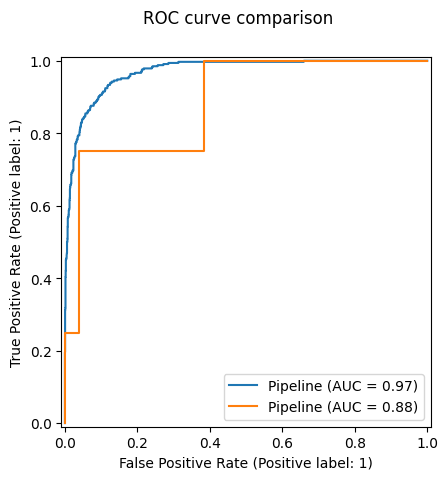

In [121]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(RFCB, X_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(RFCB, X_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

In [167]:
y_pred_probs=RFCB.predict_proba(X_train)[:,1]

In [168]:
#nuevo punto de corte
y_pred_probs.mean()

np.float64(0.283602510370957)

In [181]:
np.where(y_pred_probs > 0.58, "si", "no")

array(['no', 'si', 'no', ..., 'no', 'no', 'no'],
      shape=(2207,), dtype='<U2')

In [182]:
y_pred2=np.where(y_pred_probs > 0.58, 1, 0)

In [183]:
confusion_matrix(y_train,y_pred2)

array([[1833,   44],
       [  94,  236]])

<Axes: xlabel='Pred', ylabel='Actual'>

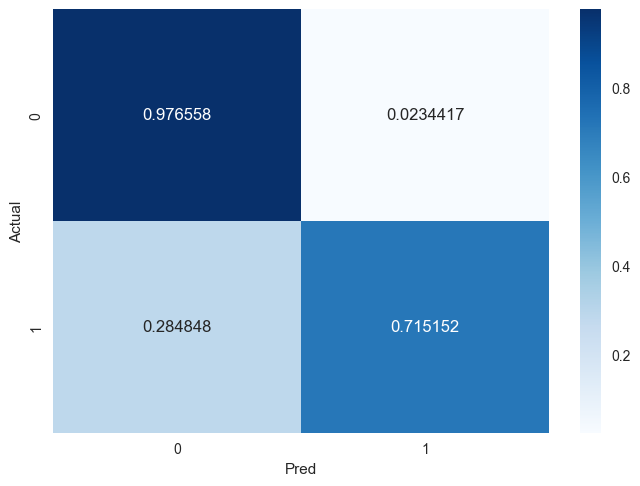

In [184]:
#nuevo 
conf_mat2=pd.crosstab(index=y_train, # ¡cambio!
                      columns=y_pred2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')

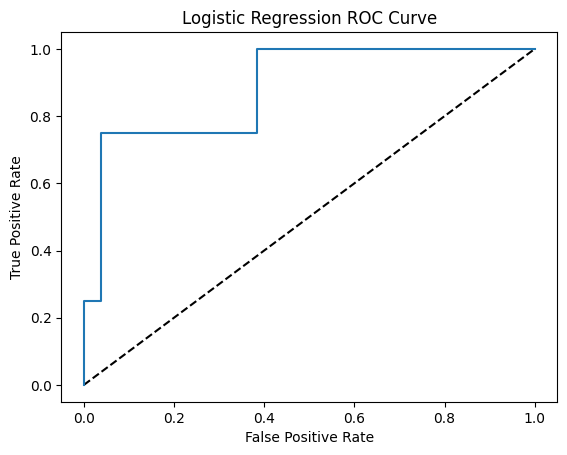

In [124]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')  # línea base
plt.plot(fpr, tpr)              # curva ROC

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

c:\Users\tomasito\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


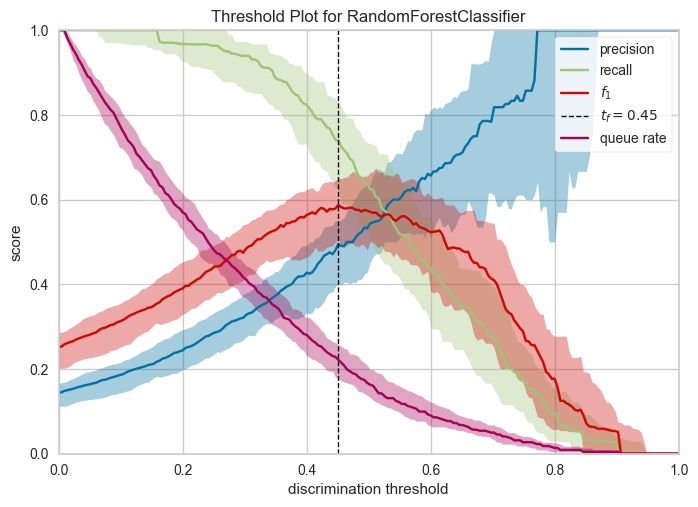

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [125]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(RFCB)

visualizer.fit(X_train, y_train)        # Ajustar data al visualizador
visualizer.show()              

<Axes: >

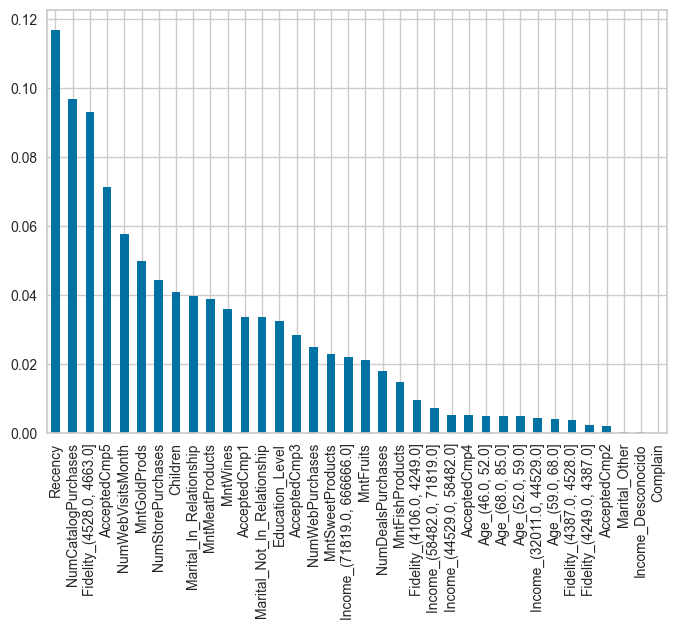

In [ ]:
importancias = pd.Series(GSclass.best_estimator_.named_steps['RFC'].feature_importances_,index=X_train.columns).sort_values(ascending=False)

importancias.plot.bar()


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>],
       [<Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>],
       [<Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>],
       [<Axes: title={'center': 'AcceptedCmp1'}>,
        <Axes: title={'center': 'AcceptedCmp2'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'Response'}>,
        <Axes: title={'center': 

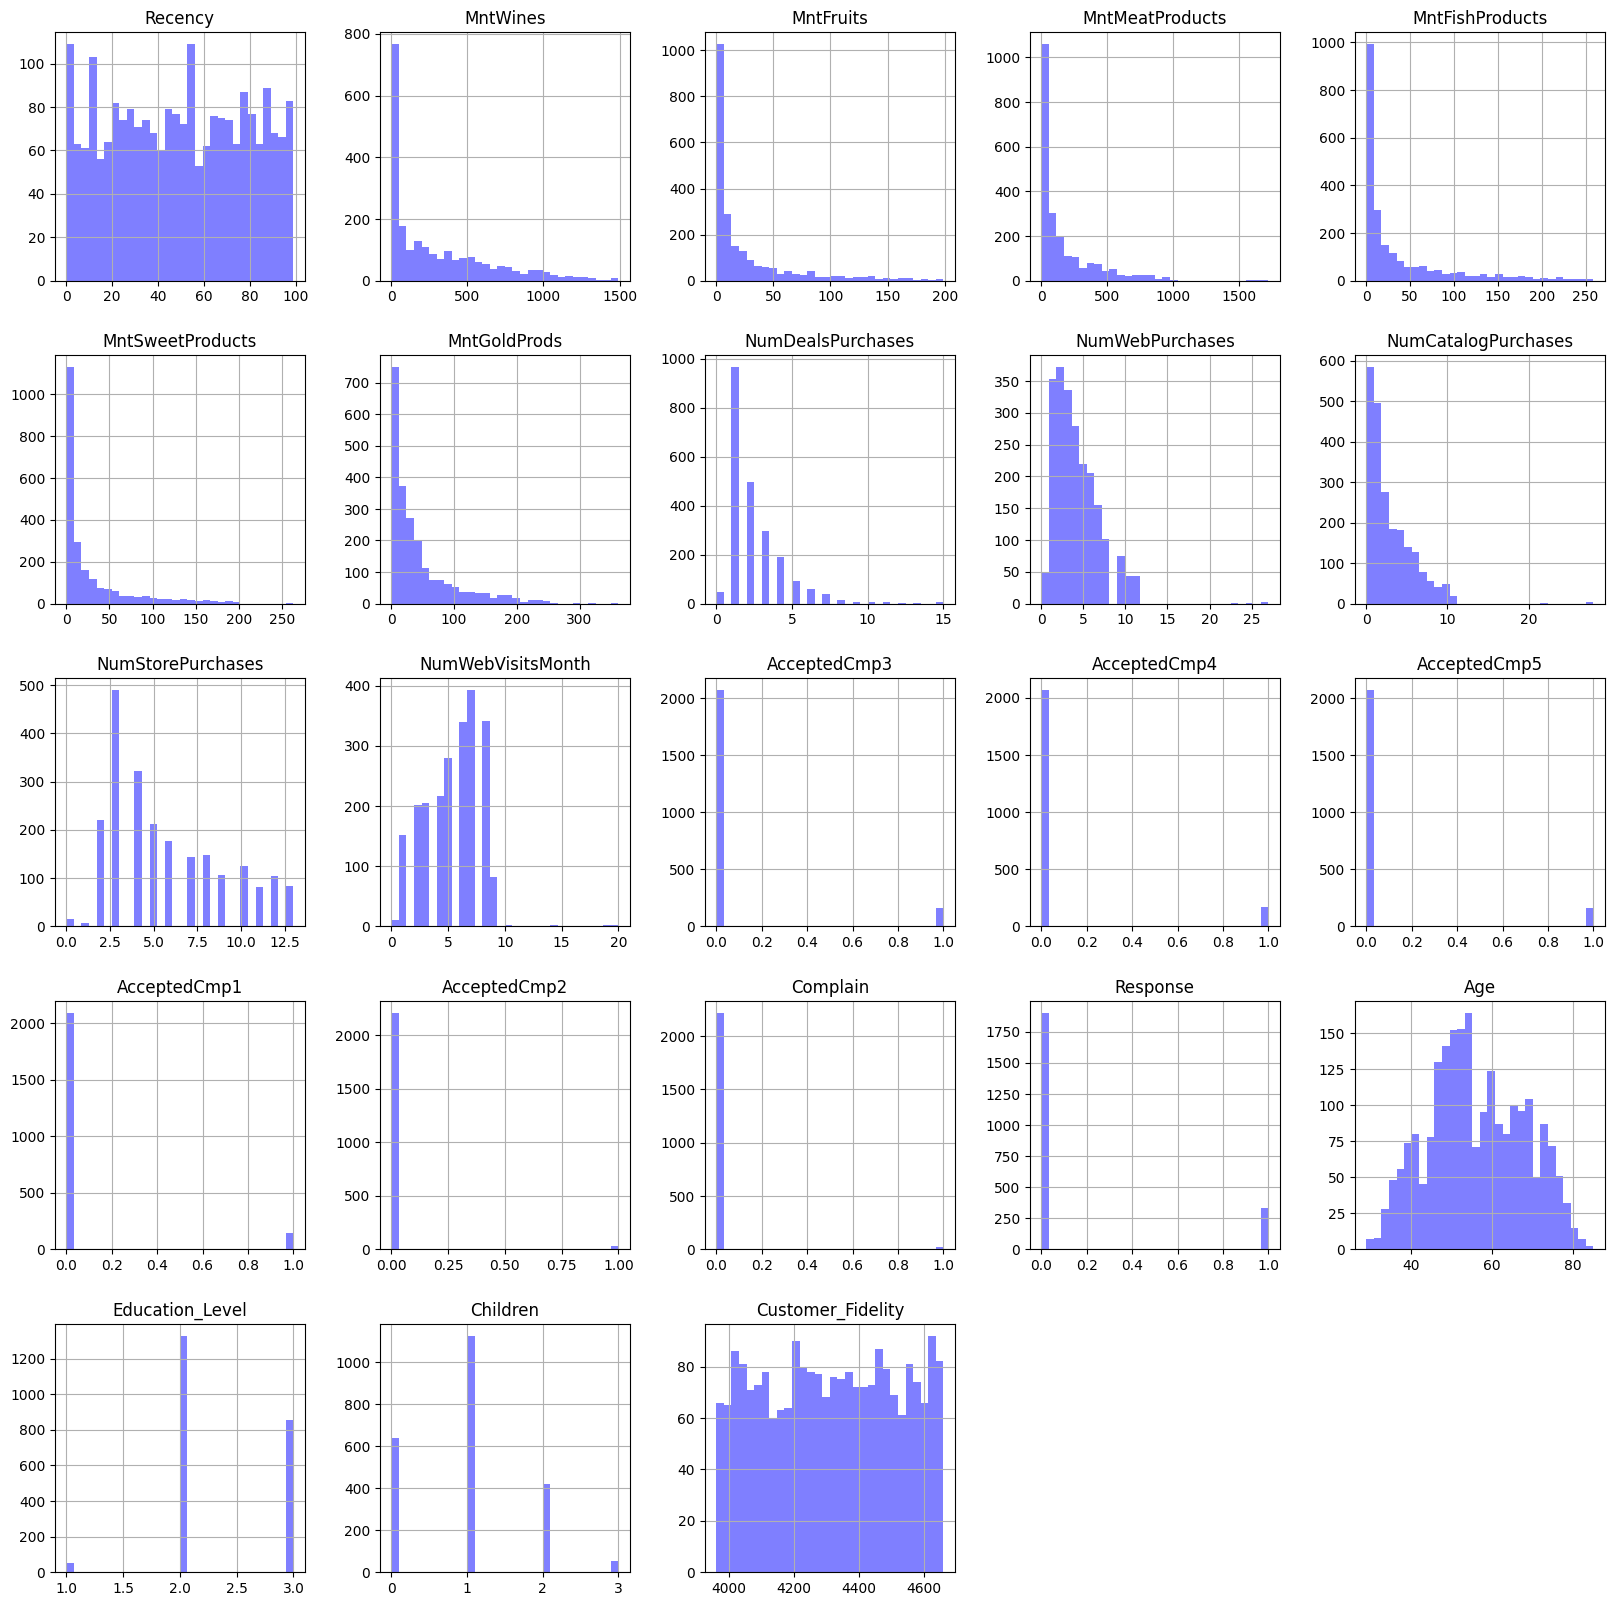

In [ ]:
#sns.heatmap(marketing.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
marketing_clasif.hist(figsize=(20, 20), bins=30, color='blue', alpha=0.5, grid=True)

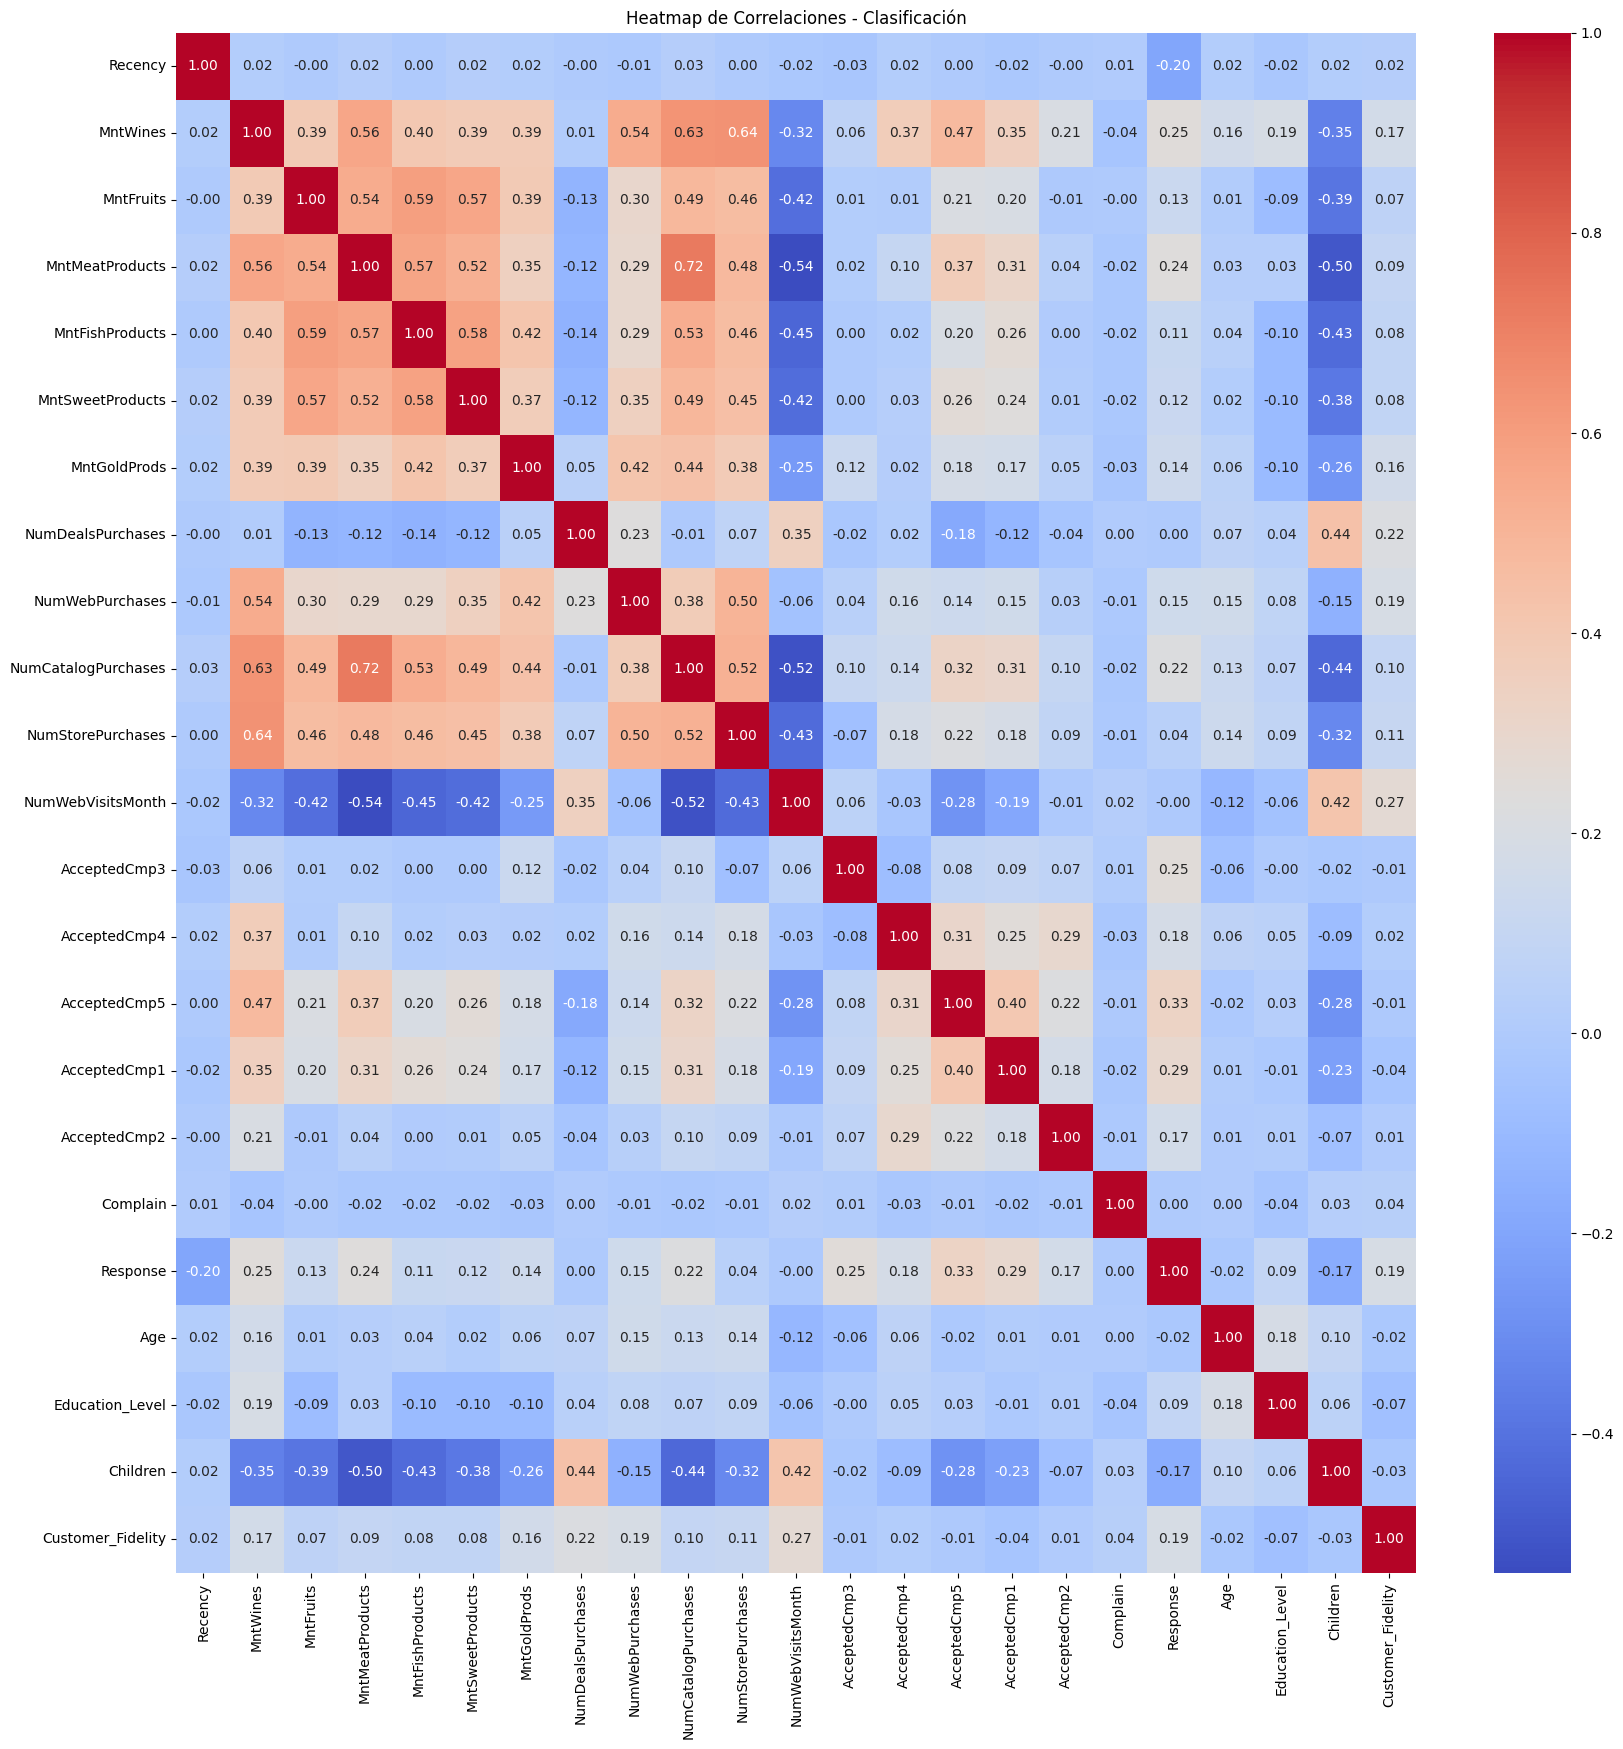

In [ ]:
#heatmap de marketing_clasif
# Seleccionar solo columnas numéricas
numeric_cols = marketing_clasif.select_dtypes(include='number')

# Crear heatmap con esas columnas
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap de Correlaciones - Clasificación')
plt.show()


In [ ]:
corr_matrix = marketing_clasif.select_dtypes(include='number').corr()


In [ ]:
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']


In [ ]:
# Filtrar donde las variables no sean iguales
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]

# Evitar pares duplicados como (A, B) y (B, A)
corr_pairs['pair'] = list(map(sorted, zip(corr_pairs['Variable 1'], corr_pairs['Variable 2'])))
corr_pairs = corr_pairs.drop_duplicates(subset='pair').drop(columns='pair')


In [ ]:
corr_pairs = corr_pairs.reindex(corr_pairs['Correlación'].abs().sort_values(ascending=False).index)


In [ ]:
# Mostrar las 10 correlaciones más fuertes (positivas o negativas)
print(corr_pairs.head(10))


         Variable 1           Variable 2  Correlación
78  MntMeatProducts  NumCatalogPurchases     0.723519
33         MntWines    NumStorePurchases     0.642433
32         MntWines  NumCatalogPurchases     0.634784
50        MntFruits      MntFishProducts     0.594438
97  MntFishProducts     MntSweetProducts     0.579553
73  MntMeatProducts      MntFishProducts     0.567880
51        MntFruits     MntSweetProducts     0.567054
26         MntWines      MntMeatProducts     0.561993
31         MntWines      NumWebPurchases     0.542177
49        MntFruits      MntMeatProducts     0.542057


In [ ]:
corr_pairs_pos = corr_pairs[corr_pairs['Correlación'] > 0.5]
corr_pairs_pos.value_counts()

Variable 1           Variable 2           Correlación
MntFishProducts      MntSweetProducts     0.579553       1
                     NumCatalogPurchases  0.534033       1
MntFruits            MntFishProducts      0.594438       1
                     MntMeatProducts      0.542057       1
                     MntSweetProducts     0.567054       1
MntMeatProducts      MntFishProducts      0.567880       1
                     MntSweetProducts     0.523418       1
                     NumCatalogPurchases  0.723519       1
MntWines             MntMeatProducts      0.561993       1
                     NumCatalogPurchases  0.634784       1
                     NumStorePurchases    0.642433       1
                     NumWebPurchases      0.542177       1
NumCatalogPurchases  NumStorePurchases    0.518884       1
NumWebPurchases      NumStorePurchases    0.502277       1
Name: count, dtype: int64

In [ ]:
corr_pairs_neg = corr_pairs[corr_pairs['Correlación'] < -0.5]
corr_pairs_neg

,Variable 1,Variable 2,Correlación
80,MntMeatProducts,NumWebVisitsMonth,-0.539203
218,NumCatalogPurchases,NumWebVisitsMonth,-0.520400
90,MntMeatProducts,Children,-0.501814
